# Analysis of Generated Corpus

This notebook performs a quality check on the `large_corpus.txt` file generated by our script. The goal is to verify that the corpus exhibits properties of natural language before using it for further research.

**Analysis Steps:**
1.  **Load Corpus**: Read the generated text file.
2.  **Calculate Basic Statistics**: Compute total words and vocabulary size.
3.  **Analyze Frequency Distribution**: Calculate word frequencies and visualize them to check for properties like Zipf's Law.
4.  **Inspect Content**: Review the most and least frequent words as a sanity check.

In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

print("✅ Libraries imported.")

# Configure plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
print("✅ Plotting configured.")

✅ Libraries imported.
✅ Plotting configured.


## 1. Load Corpus and Calculate Basic Statistics
First, we load the `large_corpus.txt` file and perform basic text processing to calculate the total number of words (tokens) and the size of the vocabulary (unique words).

In [4]:
# Load the generated corpus
try:
    with open('large_corpus.txt', 'r', encoding='utf-8') as f:
        corpus_text = f.read()
    print("✅ Corpus loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'large_corpus.txt' not found. Please ensure the generation script has been run.")
    corpus_text = ""

if corpus_text:
    # Tokenize the text into words using a simple regex
    # This finds sequences of word characters, converting to lowercase
    words = re.findall(r'\b\w+\b', corpus_text.lower())
    
    # Calculate statistics
    total_words = len(words)
    unique_words = len(set(words))
    
    print("\n--- Corpus Statistics ---")
    print(f"Total Words (Tokens): {total_words:,}")
    print(f"Vocabulary Size (Unique Words): {unique_words:,}")
    print("-------------------------")

✅ Corpus loaded successfully.

--- Corpus Statistics ---
Total Words (Tokens): 5,356
Vocabulary Size (Unique Words): 1,970
-------------------------


## 2. Calculate and Visualize Word Frequency Distribution (Zipf's Law)
A key characteristic of natural language is that the frequency of any word is inversely proportional to its rank in the frequency table. When plotted on a log-log scale, this relationship should appear as a straight line. This is known as Zipf's Law and serves as an excellent quality check for our generated corpus.

Plotting the frequency distribution...


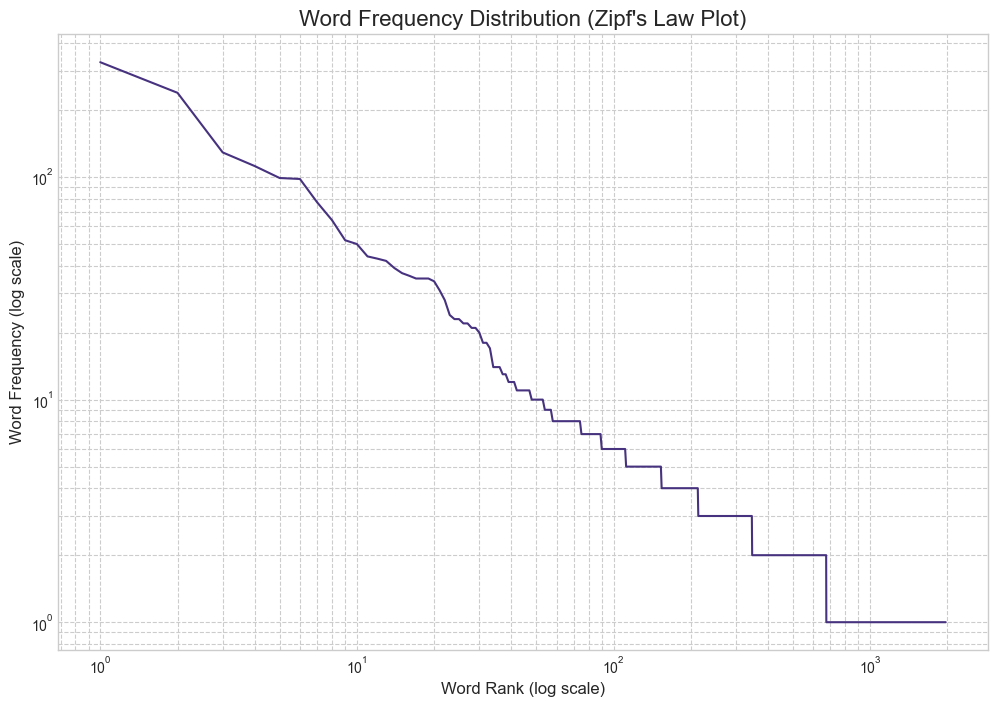

In [5]:
if 'words' in locals() and words:
    # Calculate word frequencies
    word_counts = Counter(words)
    
    # Get the frequencies and sort them in descending order
    frequencies = sorted(word_counts.values(), reverse=True)
    
    # Create ranks for the x-axis
    ranks = np.arange(1, len(frequencies) + 1)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    plt.loglog(ranks, frequencies)
    plt.title("Word Frequency Distribution (Zipf's Law Plot)", fontsize=16)
    plt.xlabel("Word Rank (log scale)", fontsize=12)
    plt.ylabel("Word Frequency (log scale)", fontsize=12)
    plt.grid(True, which="both", ls="--")
    
    print("Plotting the frequency distribution...")
    plt.show()
else:
    print("⚠️ No words available to plot. Please run the previous cells.")

## 3. Inspect Most and Least Frequent Words
As a final sanity check, let's look at the most common and least common words. The most frequent should be common function words (e.g., 'the', 'a', 'is'). The least frequent words can give us an idea of the diversity and potential noise at the tail end of the distribution.

In [6]:
if 'word_counts' in locals():
    # Create a DataFrame for easier viewing
    freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])
    freq_df = freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

    print("--- Top 20 Most Frequent Words ---")
    print(freq_df.head(20))
    print("\n" + "="*35 + "\n")
    
    # Words that appear only once
    single_occurrence_words = freq_df[freq_df['frequency'] == 1]
    
    print(f"--- {len(single_occurrence_words)} Words with a Single Occurrence (Hapax Legomena) ---")
    # Display a random sample if there are many
    if len(single_occurrence_words) > 20:
        print("(Showing a random sample of 20)")
        print(single_occurrence_words.sample(20))
    else:
        print(single_occurrence_words)
        
else:
    print("⚠️ Word counts not available. Please run previous cells.")


--- Top 20 Most Frequent Words ---
    word  frequency
0    the        328
1      a        239
2     of        129
3     it        112
4     in         99
5    and         98
6     to         77
7      s         64
8   that         52
9   with         50
10   but         44
11   not         43
12  like         42
13    is         39
14     t         37
15   her         36
16   she         35
17   was         35
18  from         35
19   for         34


--- 1296 Words with a Single Occurrence (Hapax Legomena) ---
(Showing a random sample of 20)
              word  frequency
1678      datasets          1
764        saucers          1
1676        framed          1
1844          soil          1
887         weaver          1
1567       travels          1
714         closed          1
1727        bright          1
898   unauthorized          1
1417     published          1
753            son          1
1890         whose          1
1027        soften          1
1873        always          1
